<a href="https://colab.research.google.com/github/RC11-SkillsClass2022-23/22101933/blob/main/Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load model

In [ ]:
import tensorflow as tf
import PIL
import random
import os
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import matplotlib.pyplot as plt
from PIL import Image
import networkx as nx
from sklearn.neighbors import NearestNeighbors
from IPython.display import Image as iImage
from IPython.display import display

##Load the MobileNet model

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(
  input_shape=(224, 224, 3), # 3 means rgb, this model is the same we use in image classification
  include_top=False, 
  pooling='avg'
)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [ ]:
mosque_images = os.listdir('/content/drive/MyDrive/Skill_class_data/Nearest_Neighbor')

In [ ]:
mosque_images.sort(key = lambda x : int(x.split('.')[0]))

In [ ]:
def processImage(imagePath, model):
  im = load_image(imagePath)
  f = model.predict(im)[0]
  return f

features = []
def image_list(mosque_images,folder):
  for m in mosque_images:
    path = os.path.join(folder, m)
    f = processImage(path, model)
    features.append(f)
  return features

In [ ]:
folder = '/content/drive/MyDrive/Skill_class_data/Nearest_Neighbor'
image_list(mosque_images,folder)

1/1 [==============================] - 0s 40ms/step


[array([0.21666394, 1.7561151 , 0.8606008 , ..., 1.5462012 , 0.2138141 ,
        0.01509685], dtype=float32),
 array([0.21882878, 1.0340673 , 1.3859679 , ..., 2.5969388 , 0.02147171,
        0.05080358], dtype=float32),
 array([0.73285145, 0.96591187, 0.02575137, ..., 0.04753256, 0.12051354,
        0.14674643], dtype=float32),
 array([0.09150655, 1.7043117 , 1.5730498 , ..., 2.324049  , 0.        ,
        0.02580175], dtype=float32),
 array([0.        , 0.55157053, 0.44259453, ..., 1.1449901 , 0.7656707 ,
        0.0748667 ], dtype=float32),
 array([0.03097064, 1.3021404 , 0.40441272, ..., 0.7582745 , 0.04210998,
        0.31552136], dtype=float32),
 array([0.96078575, 1.0501031 , 0.9196656 , ..., 0.70240474, 0.3006286 ,
        0.37096223], dtype=float32),
 array([0.13907768, 2.1632128 , 2.379914  , ..., 1.6427441 , 0.01487845,
        0.02355758], dtype=float32),
 array([1.0151066 , 0.07640063, 0.06506272, ..., 1.5015103 , 0.3923953 ,
        0.30794448], dtype=float32),
 array([0.

In [ ]:
features

[array([0.21666394, 1.7561151 , 0.8606008 , ..., 1.5462012 , 0.2138141 ,
        0.01509685], dtype=float32),
 array([0.21882878, 1.0340673 , 1.3859679 , ..., 2.5969388 , 0.02147171,
        0.05080358], dtype=float32),
 array([0.73285145, 0.96591187, 0.02575137, ..., 0.04753256, 0.12051354,
        0.14674643], dtype=float32),
 array([0.09150655, 1.7043117 , 1.5730498 , ..., 2.324049  , 0.        ,
        0.02580175], dtype=float32),
 array([0.        , 0.55157053, 0.44259453, ..., 1.1449901 , 0.7656707 ,
        0.0748667 ], dtype=float32),
 array([0.03097064, 1.3021404 , 0.40441272, ..., 0.7582745 , 0.04210998,
        0.31552136], dtype=float32),
 array([0.96078575, 1.0501031 , 0.9196656 , ..., 0.70240474, 0.3006286 ,
        0.37096223], dtype=float32),
 array([0.13907768, 2.1632128 , 2.379914  , ..., 1.6427441 , 0.01487845,
        0.02355758], dtype=float32),
 array([1.0151066 , 0.07640063, 0.06506272, ..., 1.5015103 , 0.3923953 ,
        0.30794448], dtype=float32),
 array([0.

In [ ]:
nbrs = NearestNeighbors(n_neighbors = 3, algorithm='auto').fit(features)
distances, indices = nbrs.kneighbors(features)
indices

array([[ 0,  5, 21],
       [ 1, 21, 12],
       [ 2, 28,  5],
       [ 3,  7, 22],
       [ 4, 11, 14],
       [ 5, 25,  0],
       [ 6, 25, 20],
       [ 7, 22, 12],
       [ 8, 27, 20],
       [ 9, 16, 10],
       [10,  9, 21],
       [11, 24, 25],
       [12, 22, 21],
       [13, 27,  5],
       [14, 19,  5],
       [15, 25,  5],
       [16,  9, 10],
       [17, 27, 23],
       [18, 14, 28],
       [19,  5, 14],
       [20, 27, 25],
       [21,  1, 12],
       [22, 12,  7],
       [23, 25, 27],
       [24, 25, 23],
       [25, 24, 23],
       [26, 27, 21],
       [27, 20,  8],
       [28,  5, 27]])

In [ ]:
def showNearestNeighbours(image_number, indices, files, path):
  for i in indices[image_number]:
    f = files[i]
    print(f)
    display(iImage(filename = os.path.join(path, f)))

7.jpg


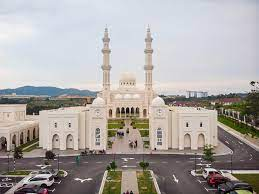

27.jpg


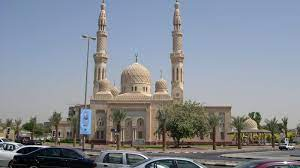

22.jpg


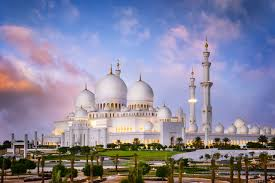

In [ ]:
showNearestNeighbours(6, indices, mosque_images, '/content/drive/MyDrive/Skill_class_data/Nearest_Neighbor')

In [ ]:
distances

array([[1.06624030e-06, 2.13176199e+01, 2.21854649e+01],
       [1.50789149e-06, 1.90220025e+01, 2.13609080e+01],
       [9.53674316e-07, 2.37474415e+01, 2.50298162e+01],
       [0.00000000e+00, 2.19077134e+01, 2.42644805e+01],
       [9.53674316e-07, 2.56818123e+01, 2.59641183e+01],
       [0.00000000e+00, 2.11984604e+01, 2.13176199e+01],
       [6.74349576e-07, 2.29271985e+01, 2.32358920e+01],
       [6.74349576e-07, 2.05371516e+01, 2.13043738e+01],
       [6.74349576e-07, 2.02923601e+01, 2.18360458e+01],
       [6.74349576e-07, 1.88503491e+01, 2.19316350e+01],
       [6.74349576e-07, 2.19316350e+01, 2.23795421e+01],
       [4.76837158e-07, 2.31038451e+01, 2.46555878e+01],
       [9.53674316e-07, 2.04649597e+01, 2.07606556e+01],
       [6.74349576e-07, 2.22960182e+01, 2.27036210e+01],
       [9.53674316e-07, 2.24021125e+01, 2.25035743e+01],
       [9.53674316e-07, 2.29944810e+01, 2.31357700e+01],
       [6.74349576e-07, 1.88503491e+01, 2.28145373e+01],
       [1.16800773e-06, 2.63577

In [ ]:
G = nx.Graph()

In [ ]:
for m in mosque_images:
  G.add_node(m)

In [ ]:
def createEdges(indices, files, distances):
  weightedEdges = []
  for i in range(len(indices)):
    image_group = indices[i]
    dist = distances[i][1:]
    
    node = files[image_group[0]]
    
    edges = []
    for e in image_group[1:]:
      edges.append(files[e])
    
    for i in range(len(edges)):
      weightedEdges.append((node, edges[i], dist[i]))
  
  return weightedEdges

In [ ]:
edges = createEdges(indices, mosque_images, distances)
edges

[('1.jpg', '6.jpg', 21.317619894555538),
 ('1.jpg', '23.jpg', 22.18546494298301),
 ('2.jpg', '23.jpg', 19.022002480526087),
 ('2.jpg', '13.jpg', 21.360908012378154),
 ('3.jpg', '30.jpg', 23.74744152543398),
 ('3.jpg', '6.jpg', 25.029816204254278),
 ('4.jpg', '8.jpg', 21.90771340177109),
 ('4.jpg', '24.jpg', 24.26448051470374),
 ('5.jpg', '12.jpg', 25.681812259983353),
 ('5.jpg', '15.jpg', 25.964118259854672),
 ('6.jpg', '27.jpg', 21.198460447442802),
 ('6.jpg', '1.jpg', 21.317619894555538),
 ('7.jpg', '27.jpg', 22.927198544642753),
 ('7.jpg', '22.jpg', 23.235892004528118),
 ('8.jpg', '24.jpg', 20.537151632297228),
 ('8.jpg', '13.jpg', 21.304373794445063),
 ('9.jpg', '29.jpg', 20.292360057642),
 ('9.jpg', '22.jpg', 21.83604581256679),
 ('10.jpg', '18.jpg', 18.850349143763808),
 ('10.jpg', '11.jpg', 21.931634972086055),
 ('11.jpg', '10.jpg', 21.931634972086055),
 ('11.jpg', '23.jpg', 22.379542054919057),
 ('12.jpg', '26.jpg', 23.103845106202694),
 ('12.jpg', '27.jpg', 24.655587809944954)

In [ ]:
G.add_weighted_edges_from(edges)

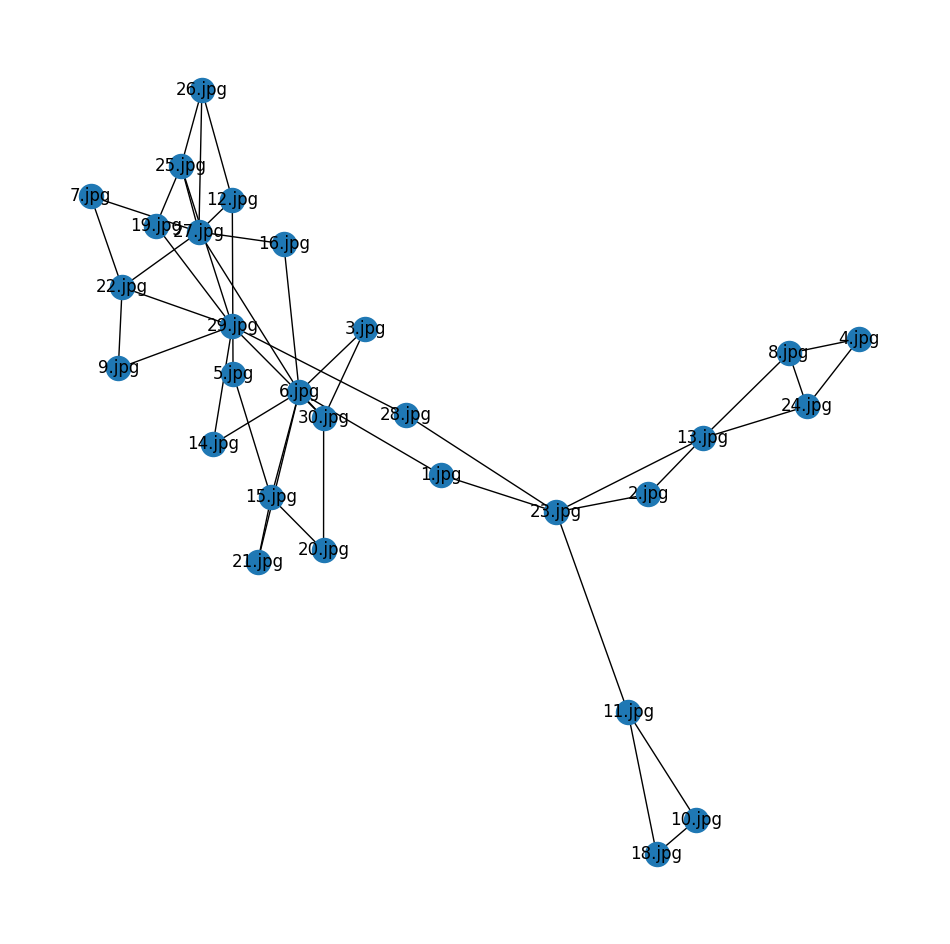

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))
nx.draw(G, with_labels=True)

In [ ]:
T = nx.minimum_spanning_tree(G)

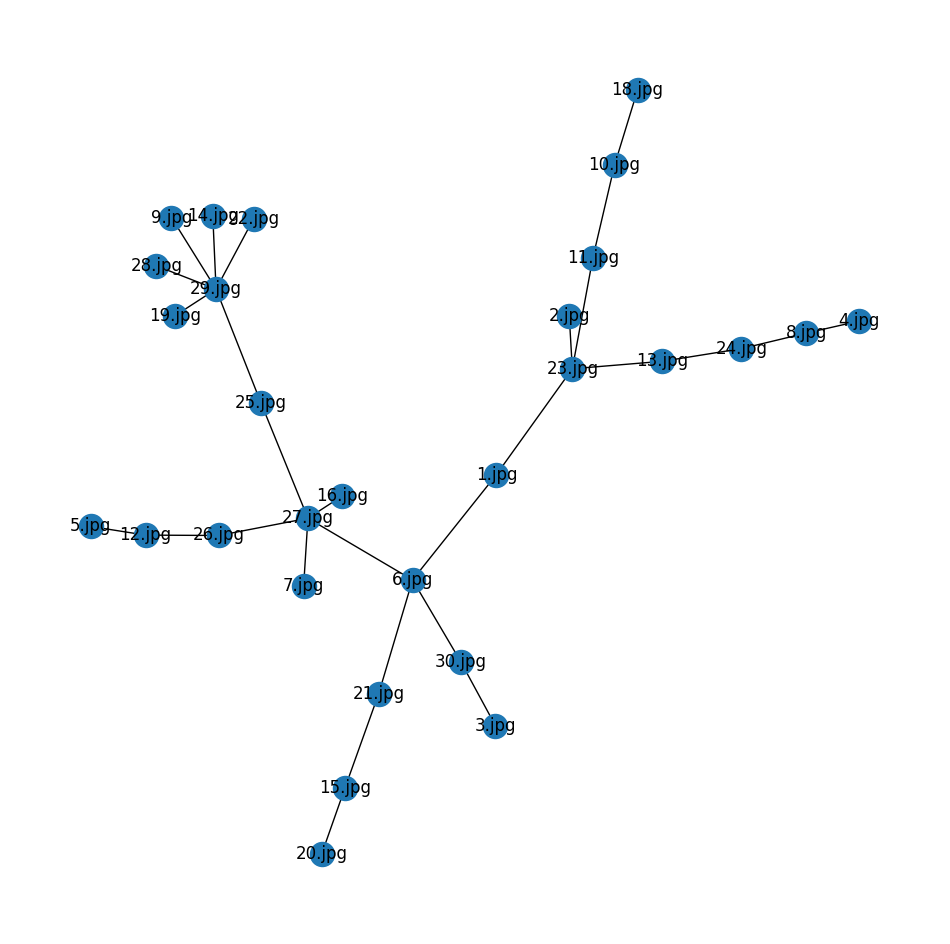

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))
nx.draw(T, with_labels=True)